# Fraud Detection
## Exploratory Data Analysis

*Author: Rebecca Neel*

Dec 13, 2023

[Data Source](https://www.kaggle.com/datasets/mykeysid10/insurance-claims-fraud-detection/)

### Import Packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
data = pd.read_csv('fraud_insurance_claims.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Inspect Data

*Check data types, size of dataframe and null value count.*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### Observations

This is a relatively small dataset (only 1000 records.)

The only feature with explicitly recorded null values is the "authorities_contacted" flag.

*Inspect numeric data.*

In [11]:
# numeric data

for col in data.select_dtypes(include=['int64']).columns:
    print(col)

months_as_customer
age
policy_number
policy_deductable
umbrella_limit
insured_zip
capital-gains
capital-loss
incident_hour_of_the_day
number_of_vehicles_involved
bodily_injuries
witnesses
total_claim_amount
injury_claim
property_claim
vehicle_claim
auto_year


#### Clarifying Numerical Feature Meanings

**policy_deductable:** the amount paid out-of-pocket by the policy-holder before an insurance provider will pay any expenses

**umbrella limit:** extra liability insurance coverage that goes beyond the limits of the insured's auto insurance (additional layer of security to those who are at risk of being sued for damages to other people's property or injuries caused to others in an accident)

**capital-gains:** monetary gains by the person

**capital-loss:** monetary loss by the person

*Inspect categorical data.*

In [12]:
# categorical data

for col in data.select_dtypes(include=['object']).columns:
    print(col)

policy_bind_date
policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
property_damage
police_report_available
auto_make
auto_model
fraud_reported


#### Clarifying Categorical Feature Meanings

**policy_csl:** per person limit / per accident limit

### Inspect Numeric Feature Distributions

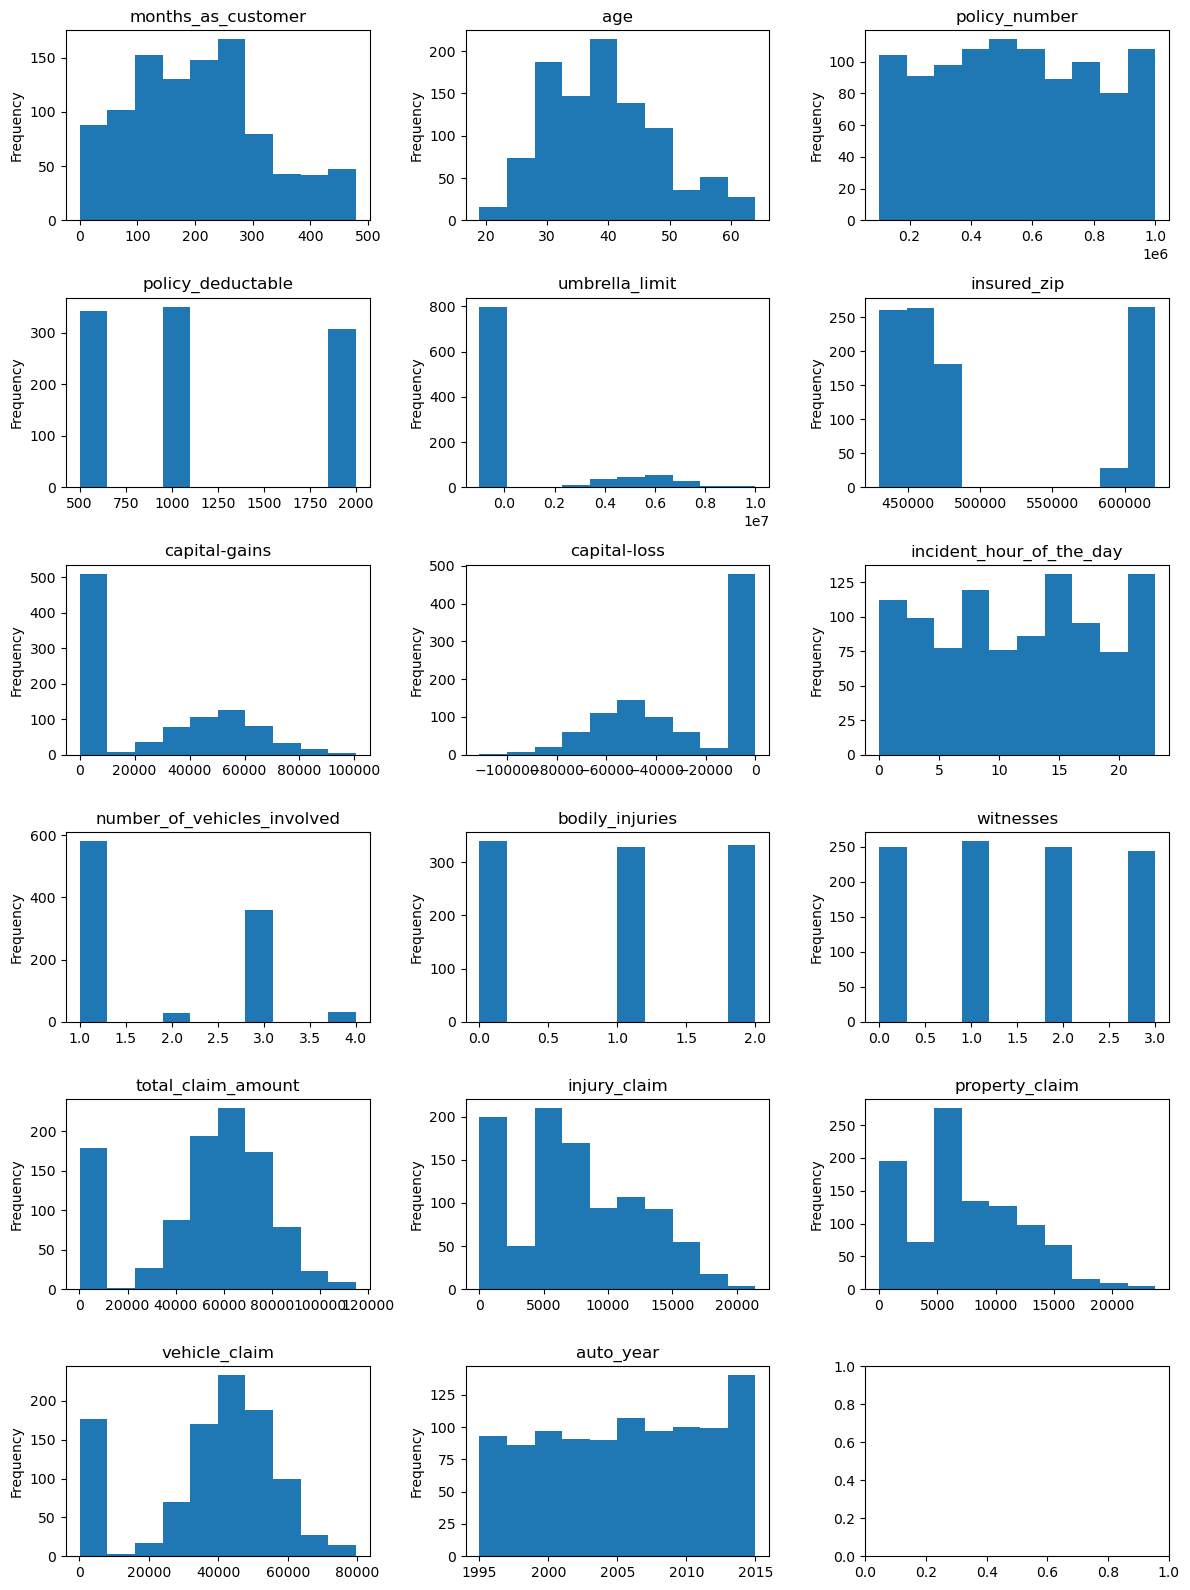

In [30]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12, 16))

for n, col in enumerate(data.select_dtypes(include=['int64']).columns):
    i = n // 3
    j = n % 3
    data[col].plot(kind='hist', ax=ax[i][j])
    ax[i][j].set_title(col)
    
    fig.tight_layout();

### Inspect Categorical Feature "Distributions"

Convert date objects to datetime objects and avoid plotting these as bar charts.

In [50]:
# convert date objects to datetime objects
data.policy_bind_date = pd.to_datetime(data.policy_bind_date)
data.incident_date = pd.to_datetime(data.incident_date)

Also exclude incident location from the categorical features plotted as a bar chart.

In [54]:
data.incident_location

0           9935 4th Drive
1             6608 MLK Hwy
2        7121 Francis Lane
3         6956 Maple Drive
4             3041 3rd Ave
              ...         
995     6045 Andromedia St
996       3092 Texas Drive
997            7629 5th St
998          6128 Elm Lane
999    1416 Cherokee Ridge
Name: incident_location, Length: 1000, dtype: object

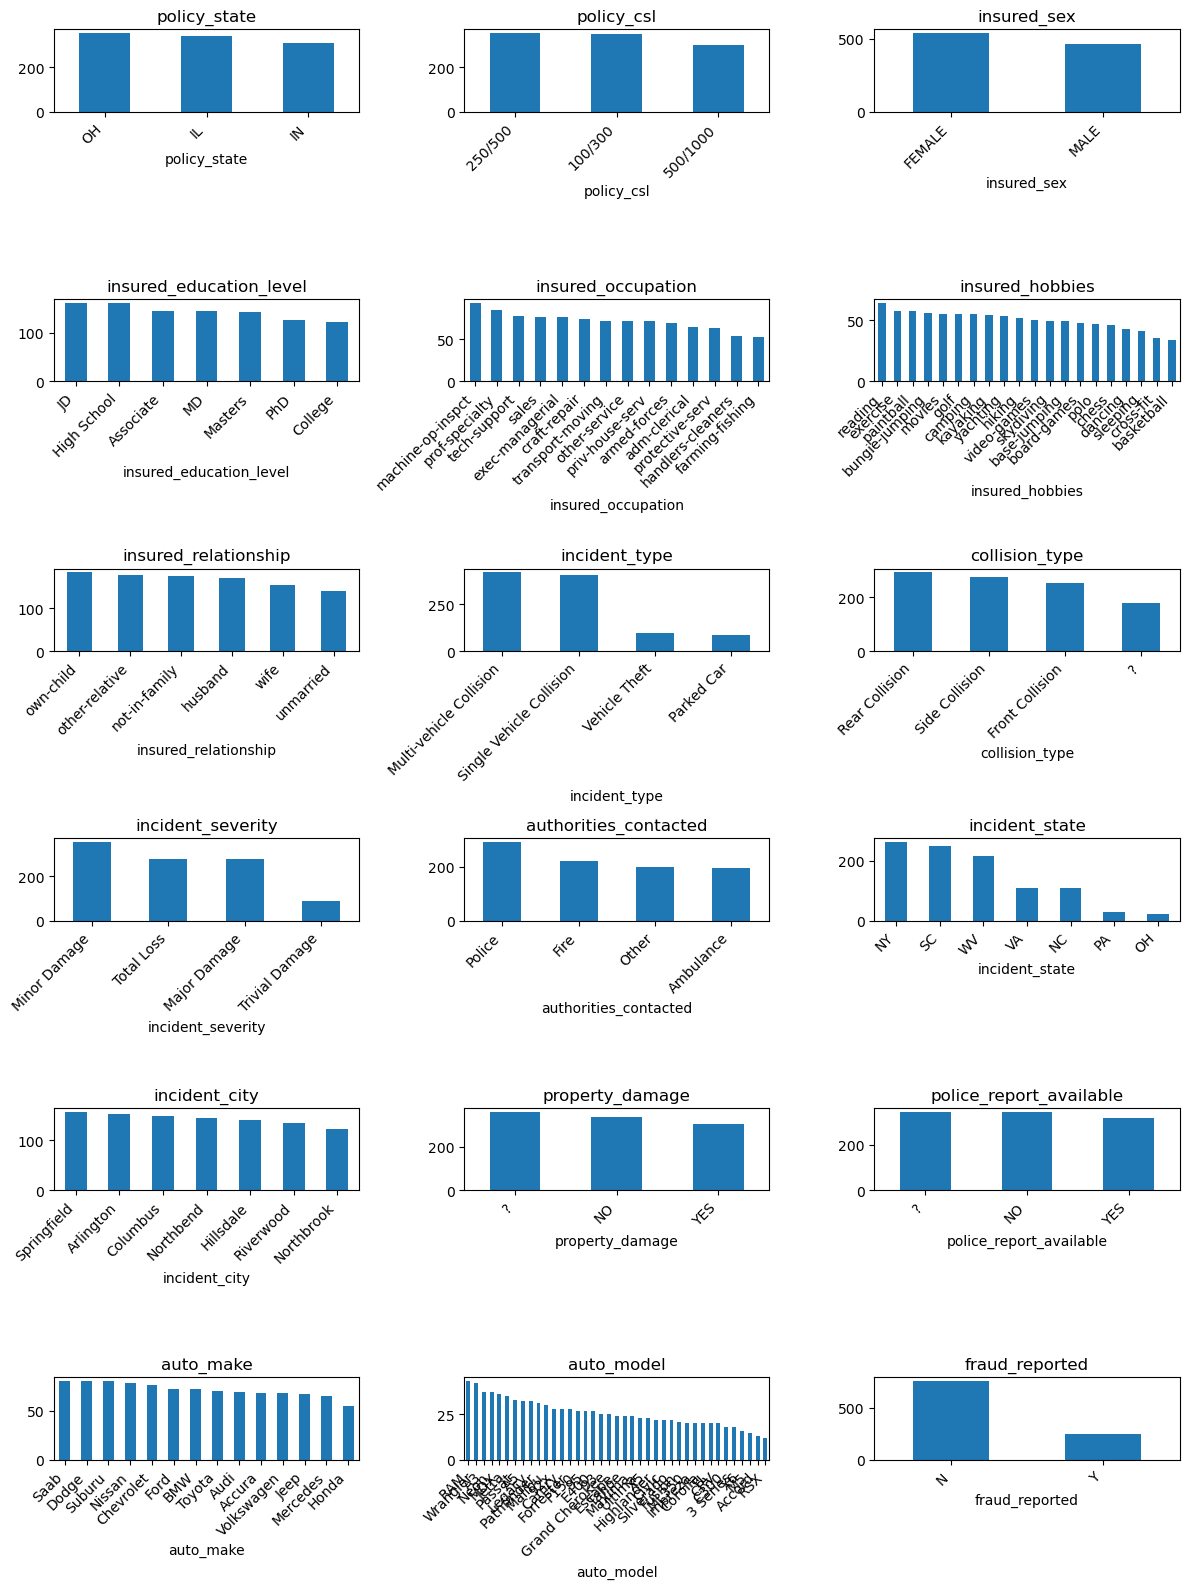

In [67]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12, 16))

for n, col in enumerate(data.drop(columns=['incident_location']).select_dtypes(include=['object']).columns):
    i = n // 3
    j = n % 3
    data[col].value_counts().plot(kind='bar', ax=ax[i][j])
    ax[i][j].set_title(col)
    ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=45, ha='right')
    
    fig.tight_layout();

In [65]:
data.fraud_reported.value_counts(normalize=True)

fraud_reported
N    0.753
Y    0.247
Name: proportion, dtype: float64

#### Observations

Though this is not a completely balanced classification problem, it is not nearly as imbalanced as I would have expected; nearly 25% of the records in this dataset were instances of fraud.

There are only 7 cities in which incidents took place, so this may give us a clue as to how the data for this model were collected.